In [1]:
# TheStage AI FLUX.1-schnell Benchmark Report
# 
# This notebook processes benchmark results from TheStage's optimized FLUX.1-schnell model
# and generates performance analysis reports and visualizations.
#
# Required dependencies:
# !pip install tabulate

In [2]:
import csv
import glob
import json
import os

import pandas as pd

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199


def load_csv_data_from_directory(root_folder):
    """
    Loads all benchmark data from a directory containing report files.
    """
    data_list = []

    # Find all stats files
    stats_files = glob.glob(os.path.join(root_folder, "*_stats.csv"))

    for stats_file_path in stats_files:
        # Construct the corresponding params file path
        base_name = os.path.basename(stats_file_path).replace('_stats.csv', '')
        params_file_path = os.path.join(os.path.dirname(stats_file_path), f"{base_name}_params.json")

        if os.path.exists(params_file_path):
            # Load stats data
            with open(stats_file_path, 'r', encoding='utf-8') as f:
                stats_reader = csv.DictReader(f)
                try:
                    stats_data = next(stats_reader)
                except StopIteration:
                    print(f"Warning: {stats_file_path} is empty, skipping.")
                    continue

            # Load params data
            with open(params_file_path, 'r', encoding='utf-8') as f:
                params_data = json.load(f)

            # Combine data
            combined_data = {**stats_data, **params_data}

            # Use model_name for Model column, if it exists in params
            if 'model_name' in combined_data:
                combined_data['Model'] = combined_data['model_name']

            data_list.append(combined_data)
        else:
            print(f"Warning: Missing params file for {stats_file_path}, skipping.")

    return pd.DataFrame(data_list)


# Load data from the current directory
root_folder = "./data"
merged_df = load_csv_data_from_directory(root_folder)
if not merged_df.empty:
    print(f"Loaded {len(merged_df)} benchmark results")
    merged_df
else:
    print("No benchmark data found.")

merged_df.sort_values(["Name", "concurrency"])

Loaded 23 benchmark results


,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,Failures/s,50%,66%,75%,80%,90%,95%,98%,99%,99.9%,99.99%,100%,command,metadata_json,metadata_url,metadata_host,metadata_port,host,port,protocol,inference_url,authorization,log_level,timeout,benchmark_type,concurrency,num_requests,output_prefix,output_dir,min_wait,max_wait,log_jsonl,command_name,model_name,utc_datetime,Model
16,inference,/v2/models/flux-1-schnell-s-bs1-paged/infer,1024,0,1800,1859.427734375,1463,4609,3145728.0,0.32368576436646207,0.0,1800,1900,2000,2000,2100,2200,2400,2700,3500,4600,4600,benchmark,None,None,pawpaw-carrot-h9uztw07sipi5naa.salad.cloud,443,pawpaw-carrot-h9uztw07sipi5naa.salad.cloud,443,https,None,123,NONE,10,diffusion,1,1024,report,data,0.5,2.0,True,benchmark,flux-1-schnell-s-bs1-paged,2025-06-25T16:56:22.853463Z,flux-1-schnell-s-bs1-paged
22,inference,/v2/models/flux-1-schnell-s-bs1-paged/infer,1024,0,1800,1826.6669921875,1411,3728,3145728.0,0.6419804653919359,0.0,1800,1800,1900,2000,2100,2200,2400,2800,3500,3700,3700,benchmark,None,None,pawpaw-carrot-h9uztw07sipi5naa.salad.cloud,443,pawpaw-carrot-h9uztw07sipi5naa.salad.cloud,443,https,None,123,NONE,10,diffusion,2,1024,report,data,0.5,2.0,True,benchmark,flux-1-schnell-s-bs1-paged,2025-06-25T17:49:09.488551Z,flux-1-schnell-s-bs1-paged
17,inference,/v2/models/flux-1-schnell-s-bs1-paged/infer,1024,0,1600,1655.015625,1258,37778,3145728.0,1.04055687376393,0.0,1600,1700,1700,1700,1800,1900,2100,2300,3200,38000,38000,benchmark,None,None,pawpaw-carrot-h9uztw07sipi5naa.salad.cloud,443,pawpaw-carrot-h9uztw07sipi5naa.salad.cloud,443,https,None,123,NONE,10,diffusion,3,1024,report,data,0.5,2.0,True,benchmark,flux-1-schnell-s-bs1-paged,2025-06-25T18:15:47.370414Z,flux-1-schnell-s-bs1-paged
19,inference,/v2/models/flux-1-schnell-s-bs1-paged/infer,1024,0,1600,1643.0234375,1289,3985,3145728.0,1.3751567635016433,0.0,1600,1700,1700,1700,1800,1900,2100,2400,2900,4000,4000,benchmark,None,None,pawpaw-carrot-h9uztw07sipi5naa.salad.cloud,443,pawpaw-carrot-h9uztw07sipi5naa.salad.cloud,443,https,None,123,NONE,10,diffusion,4,1024,report,data,0.5,2.0,True,benchmark,flux-1-schnell-s-bs1-paged,2025-06-25T18:32:14.167458Z,flux-1-schnell-s-bs1-paged
20,inference,/v2/models/flux-1-schnell-s-bs1-paged/infer,1024,0,1600,1616.17578125,1349,3020,3145728.0,1.7324615682764253,0.0,1600,1600,1700,1700,1800,1900,2000,2400,2900,3000,3000,benchmark,None,None,pawpaw-carrot-h9uztw07sipi5naa.salad.cloud,443,pawpaw-carrot-h9uztw07sipi5naa.salad.cloud,443,https,None,123,NONE,10,diffusion,5,1024,report,data,0.5,2.0,True,benchmark,flux-1-schnell-s-bs1-paged,2025-06-25T18:44:41.950751Z,flux-1-schnell-s-bs1-paged
14,inference,/v2/models/flux-1-schnell-s-bs1-paged/infer,1024,0,1500,1581.865234375,1235,3403,3145728.0,2.1009657555187373,0.0,1500,1600,1600,1700,1800,1900,2400,2500,3000,3400,3400,benchmark,None,None,pawpaw-carrot-h9uztw07sipi5naa.salad.cloud,443,pawpaw-carrot-h9uztw07sipi5naa.salad.cloud,443,https,None,123,NONE,10,diffusion,6,1024,report,data,0.5,2.0,True,benchmark,flux-1-schnell-s-bs1-paged,2025-06-25T18:54:35.856360Z,flux-1-schnell-s-bs1-paged
12,inference,/v2/models/flux-1-schnell-s-bs1-paged/infer,1025,1,1500,1535.0487804878048,72,3099,3142658.9970731707,2.4909457193449276,0.0024301909457023685,1500,1600,1600,1600,1700,1800,2000,2100,2800,3100,3100,benchmark,None,None,pawpaw-carrot-h9uztw07sipi5naa.salad.cloud,443,pawpaw-carrot-h9uztw07sipi5naa.salad.cloud,443,https,None,123,NONE,10,diffusion,7,1024,report,data,0.5,2.0,True,benchmark,flux-1-schnell-s-bs1-paged,2025-06-25T19:02:45.473950Z,flux-1-schnell-s-bs1-paged
10,inference,/v2/models/flux-1-schnell-s-bs1-paged/infer,1024,0,1500,1574.6982421875,1314,3713,3145728.0,2.8094611577047237,0.0,1500,1600,1600,1700,1800,1800,2100,2300,3400,3700,3700,benchmark,None,None,pawpaw-carrot-h9uztw07sipi5naa.salad.cloud,443,pawpaw-carrot-h9uztw07sipi5naa.salad.cloud,443,https,None,123,NONE,10,diffusio

In [3]:
# Convert all columns to the best possible dtype, except for categorical columns
categorical_columns = ['Type', 'Name', 'Model', 'model_name', 'benchmark_type', 'utc_datetime']
numeric_columns = merged_df.columns.difference(categorical_columns)

# Apply pd.to_numeric() and convert errors to NaN
for col in numeric_columns:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Convert concurrency to int for proper sorting
if 'concurrency' in merged_df.columns:
    merged_df['concurrency'] = merged_df['concurrency'].astype(int)

In [4]:
merged_df["Failures Percent"] = merged_df["Failure Count"] / merged_df["Request Count"]

In [5]:
selected_columns = [
    "Model",
    "concurrency",
    "Requests/s",
    "Request Count",
    "Failure Count",
    "Median Response Time",
    "Average Response Time",
    "Min Response Time",
    "Max Response Time",
    "Average Content Size",
    "Failures/s",
    "Failures Percent",
    "50%",
    "66%",
    "75%",
    "80%",
    "90%",
    "95%",
    "98%",
    "99%",
    "99.9%",
    "99.99%",
    "100%",
    "min_wait",
    "max_wait",
    "utc_datetime"
]

In [6]:
merged_df[selected_columns].sort_values("concurrency").to_csv(f"{root_folder}/results.csv", index=False)

In [7]:
with open(f"{root_folder}/results.md", "w") as f:
    f.write(merged_df[selected_columns].sort_values("concurrency").to_markdown())

## Performance Summary

The following table shows key performance metrics across different concurrency levels:

In [8]:
merged_df[['Model', 'concurrency', 'Average Response Time', 'Requests/s', 'Failures Percent']].sort_values(
    ["concurrency"])

,Model,concurrency,Average Response Time,Requests/s,Failures Percent
16,flux-1-schnell-s-bs1-paged,1,1859.427734,0.323686,0.000000
22,flux-1-schnell-s-bs1-paged,2,1826.666992,0.641980,0.000000
17,flux-1-schnell-s-bs1-paged,3,1655.015625,1.040557,0.000000
19,flux-1-schnell-s-bs1-paged,4,1643.023438,1.375157,0.000000
20,flux-1-schnell-s-bs1-paged,5,1616.175781,1.732462,0.000000
14,flux-1-schnell-s-bs1-paged,6,1581.865234,2.100966,0.000000
12,flux-1-schnell-s-bs1-paged,7,1535.048780,2.490946,0.000976
10,flux-1-schnell-s-bs1-paged,8,1574.698242,2.809461,0.000000
11,flux-1-schnell-s-bs1-paged,10,1560.505859,3.493586,0.000000
21,flux-1-schnell-s-bs1-paged,12,1559.300781,4.166182,0.000000


## Complete Benchmark Results

Full dataset with all metrics and parameters: 

In [9]:
merged_df.sort_values(["concurrency"])

,Type,Name,Request Count,Failure Count,Median Response Time,Average Response Time,Min Response Time,Max Response Time,Average Content Size,Requests/s,Failures/s,50%,66%,75%,80%,90%,95%,98%,99%,99.9%,99.99%,100%,command,metadata_json,metadata_url,metadata_host,metadata_port,host,port,protocol,inference_url,authorization,log_level,timeout,benchmark_type,concurrency,num_requests,output_prefix,output_dir,min_wait,max_wait,log_jsonl,command_name,model_name,utc_datetime,Model,Failures Percent
16,inference,/v2/models/flux-1-schnell-s-bs1-paged/infer,1024,0,1800,1859.427734,1463,4609,3.145728e+06,0.323686,0.00000,1800,1900,2000,2000,2100,2200,2400,2700,3500,4600,4600,NaN,NaN,NaN,NaN,443,NaN,443,NaN,NaN,123,NaN,10,diffusion,1,1024,NaN,NaN,0.5,2.0,True,NaN,flux-1-schnell-s-bs1-paged,2025-06-25T16:56:22.853463Z,flux-1-schnell-s-bs1-paged,0.000000
22,inference,/v2/models/flux-1-schnell-s-bs1-paged/infer,1024,0,1800,1826.666992,1411,3728,3.145728e+06,0.641980,0.00000,1800,1800,1900,2000,2100,2200,2400,2800,3500,3700,3700,NaN,NaN,NaN,NaN,443,NaN,443,NaN,NaN,123,NaN,10,diffusion,2,1024,NaN,NaN,0.5,2.0,True,NaN,flux-1-schnell-s-bs1-paged,2025-06-25T17:49:09.488551Z,flux-1-schnell-s-bs1-paged,0.000000
17,inference,/v2/models/flux-1-schnell-s-bs1-paged/infer,1024,0,1600,1655.015625,1258,37778,3.145728e+06,1.040557,0.00000,1600,1700,1700,1700,1800,1900,2100,2300,3200,38000,38000,NaN,NaN,NaN,NaN,443,NaN,443,NaN,NaN,123,NaN,10,diffusion,3,1024,NaN,NaN,0.5,2.0,True,NaN,flux-1-schnell-s-bs1-paged,2025-06-25T18:15:47.370414Z,flux-1-schnell-s-bs1-paged,0.000000
19,inference,/v2/models/flux-1-schnell-s-bs1-paged/infer,1024,0,1600,1643.023438,1289,3985,3.145728e+06,1.375157,0.00000,1600,1700,1700,1700,1800,1900,2100,2400,2900,4000,4000,NaN,NaN,NaN,NaN,443,NaN,443,NaN,NaN,123,NaN,10,diffusion,4,1024,NaN,NaN,0.5,2.0,True,NaN,flux-1-schnell-s-bs1-paged,2025-06-25T18:32:14.167458Z,flux-1-schnell-s-bs1-paged,0.000000
20,inference,/v2/models/flux-1-schnell-s-bs1-paged/infer,1024,0,1600,1616.175781,1349,3020,3.145728e+06,1.732462,0.00000,1600,1600,1700,1700,1800,1900,2000,2400,2900,3000,3000,NaN,NaN,NaN,NaN,443,NaN,443,NaN,NaN,123,NaN,10,diffusion,5,1024,NaN,NaN,0.5,2.0,True,NaN,flux-1-schnell-s-bs1-paged,2025-06-25T18:44:41.950751Z,flux-1-schnell-s-bs1-paged,0.000000
14,inference,/v2/models/flux-1-schnell-s-bs1-paged/infer,1024,0,1500,1581.865234,1235,3403,3.145728e+06,2.100966,0.00000,1500,1600,1600,1700,1800,1900,2400,2500,3000,3400,3400,NaN,NaN,NaN,NaN,443,NaN,443,NaN,NaN,123,NaN,10,diffusion,6,1024,NaN,NaN,0.5,2.0,True,NaN,flux-1-schnell-s-bs1-paged,2025-06-25T18:54:35.856360Z,flux-1-schnell-s-bs1-paged,0.000000
12,inference,/v2/models/flux-1-schnell-s-bs1-paged/infer,1025,1,1500,1535.048780,72,3099,3.142659e+06,2.490946,0.00243,1500,1600,1600,1600,1700,1800,2000,2100,2800,3100,3100,NaN,NaN,NaN,NaN,443,NaN,443,NaN,NaN,123,NaN,10,diffusion,7,1024,NaN,NaN,0.5,2.0,True,NaN,flux-1-schnell-s-bs1-paged,2025-06-25T19:02:45.473950Z,flux-1-schnell-s-bs1-paged,0.000976
10,inference,/v2/models/flux-1-schnell-s-bs1-paged/infer,1024,0,1500,1574.698242,1314,3713,3.145728e+06,2.809461,0.00000,1500,1600,1600,1700,1800,1800,2100,2300,3400,3700,3700,NaN,NaN,NaN,NaN,443,NaN,443,NaN,NaN,123,NaN,10,diffusion,8,1024,NaN,NaN,0.5,2.0,True,NaN,flux-1-schnell-s-bs1-paged,2025-06-25T23:53:10.510714Z,flux-1-schnell-s-bs1-paged,0.000000
11,inference,/v2/models/flux-1-schnell-s-bs1-paged/infer,1024,0,1500,1560.505859,1232,3651,3.145728e+06,3.493586,0.00000,1500,1600,1600,1700,1700,1900,2200,2500,3100,3700,3700,NaN,NaN,NaN,NaN,443,NaN,443,NaN,NaN,123,NaN,10,diffusion,10,1024,NaN,NaN,0.5,2.0,True,NaN,flux-1-schnell-s-bs1-paged,2025-06-26T00:33:11.710405Z,flux-1-schnell-s-bs1-paged,0.000000
21,inference,/v2/models/flux-1-schnell-s-bs1-paged/infer,1024,0,1500,1559.300781,1216,3702,3.145728e+06,4.166182,0.00000,1500,1600,1600,1700,1800,1900,2300,2500,3300,3700,3700,NaN,NaN,NaN,NaN,443,NaN,443,NaN,NaN,123,NaN,10,diffusion,12,1024,NaN,NaN,0.5,2.0,True,NaN,flux-1-schnell-s-bs1-paged,2025-06-2

## Performance Visualizations

### Methodology
- **Failure Threshold**: Results with >1% failure rate are zeroed out
- **Hardware**: RTX 5090 (32GB VRAM), 4 vCPU, 8GB RAM
- **Test Parameters**: 1024x1024 resolution, 4 steps, Euler sampler

In [10]:
df = merged_df.copy()

FAILURES_PERCENT_TRESHOLD = 0.01

# Zero if batch breaking model
df['Average Response Time'] = df.apply(
    lambda x: 0 if (x['Failures Percent'] > FAILURES_PERCENT_TRESHOLD) else x['Average Response Time'], axis=1)
df['Requests/s'] = df.apply(lambda x: 0 if x['Failures Percent'] > FAILURES_PERCENT_TRESHOLD else x['Requests/s'],
                            axis=1)


In [11]:
os.makedirs("img", exist_ok=True)

### Throughput Analysis (RPS vs Concurrency)
This chart shows how many requests per second the model can handle at different concurrency levels.


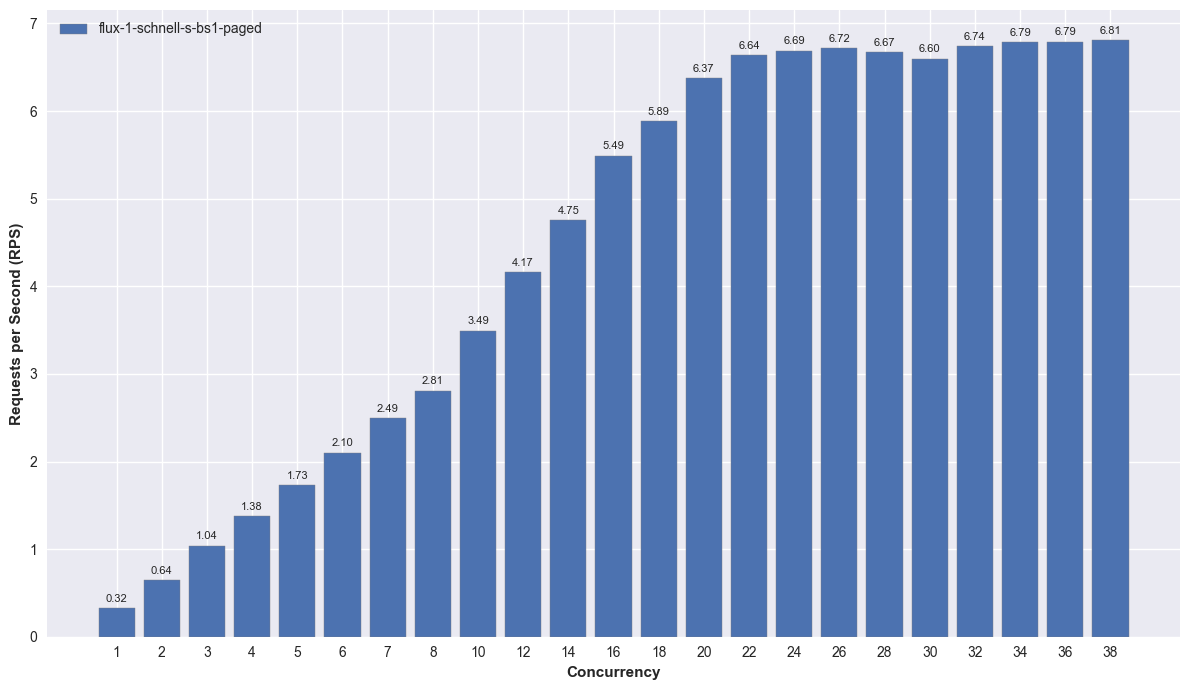

In [12]:
import matplotlib.pyplot as plt
import numpy as np

print("### Throughput Analysis (RPS vs Concurrency)")
print("This chart shows how many requests per second the model can handle at different concurrency levels.")

# Dynamically create model name map from available models
unique_models = df['Model'].unique()
model_name_map = {model: model for model in unique_models}

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(12, 7))

# Get color cycle from style
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Get sorted concurrency levels and model list
concurrency_levels = sorted(df['concurrency'].unique())
models = list(model_name_map.items())
num_models = len(models)

# Calculate dynamic bar width (adjust 0.8 to control total group width)
bar_width = 0.8 / num_models if num_models > 0 else 0.8
base_positions = np.arange(len(concurrency_levels))


def add_values_on_bars(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}' if height > 0 else 'N/A',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', size=8)


# Plot each model's data
for idx, (orig_name, plot_name) in enumerate(models):
    model_data = df[df['Model'] == orig_name].sort_values('concurrency')
    positions = base_positions + idx * bar_width
    color = color_cycle[idx % len(color_cycle)]

    bars = ax.bar(positions, model_data['Requests/s'],
                  width=bar_width, label=plot_name,
                  color=color, edgecolor='grey')
    add_values_on_bars(ax, bars)

# Configure axes and labels
ax.set_xlabel('Concurrency', fontweight='bold')
ax.set_ylabel('Requests per Second (RPS)', fontweight='bold')
ax.set_xticks(base_positions + (num_models - 1) * bar_width / 2)
ax.set_xticklabels(concurrency_levels)
ax.grid(True)
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()
fig.savefig("img/rps.png")

### Response Time Analysis
This chart shows average response time (latency) at different concurrency levels.


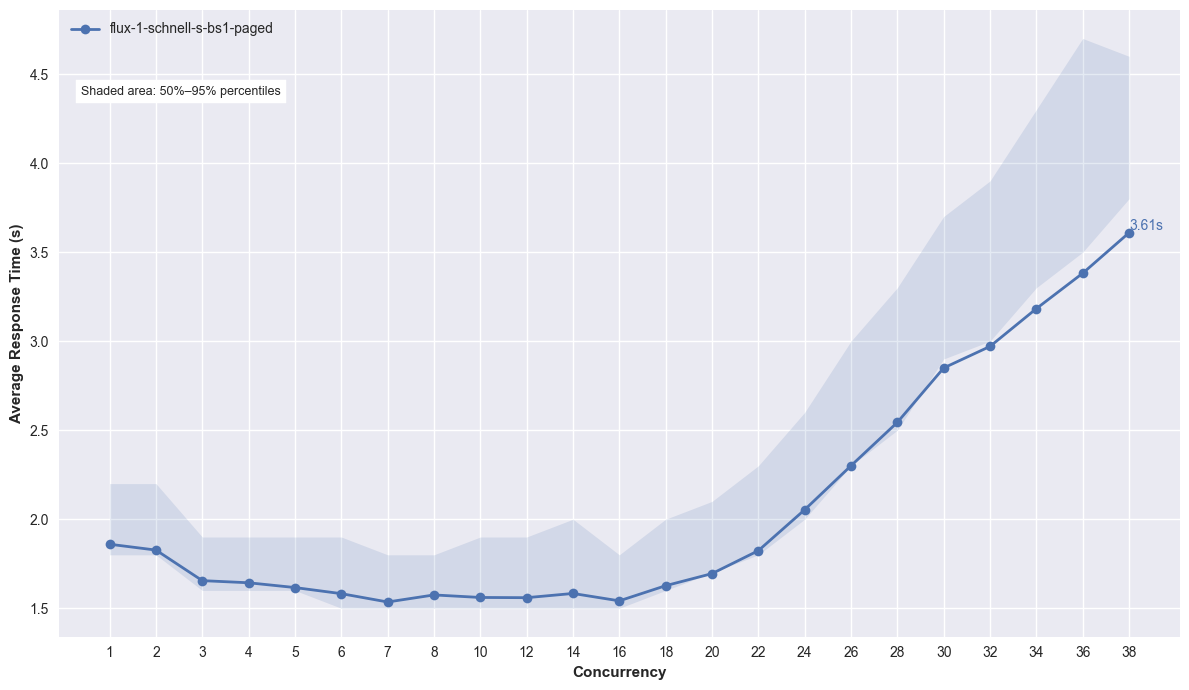

In [13]:
print("### Response Time Analysis")
print("This chart shows average response time (latency) at different concurrency levels.")

plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(12, 7))

# Style configuration
markers = ['o', 's', '^', 'D', 'p', '*']
linestyles = ['-', '--', '-.', ':']
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Define percentiles for distribution shading (if available)
lower_percentile = '50%'  # Median
upper_percentile = '95%'  # 95th percentile

# Get sorted concurrency values and positions
concurrency_levels = sorted(df['concurrency'].unique())
x_positions = np.arange(len(concurrency_levels))

# Plot each model's response time with distribution
for idx, (orig_name, plot_name) in enumerate(model_name_map.items()):
    model_data = df[df['Model'] == orig_name].sort_values('concurrency')
    response_time = model_data['Average Response Time'] / 1000
    color = color_cycle[idx % len(color_cycle)]

    # Check if percentile columns exist for distribution shading
    has_percentiles = lower_percentile in model_data.columns and upper_percentile in model_data.columns

    if has_percentiles:
        lower = model_data[lower_percentile] / 1000
        upper = model_data[upper_percentile] / 1000

        # Plot distribution first (underneath the line)
        ax.fill_between(
            x_positions,
            lower,
            upper,
            color=color,
            alpha=0.15,
            linewidth=0  # Remove edge lines
        )

    # Then plot average response time line
    ax.plot(
        x_positions,
        response_time,
        color=color,
        marker=markers[idx % len(markers)],
        linestyle=linestyles[idx % len(linestyles)],
        linewidth=2,
        label=plot_name
    )

# Configure plot elements
ax.set_xlabel('Concurrency', fontweight='bold')
ax.set_ylabel('Average Response Time (s)', fontweight='bold')
ax.set_xticks(x_positions)
ax.set_xticklabels(concurrency_levels)
ax.grid(True)

# Add distribution explanation only if percentiles are available
if any(lower_percentile in df.columns and upper_percentile in df.columns for _ in [1]):
    ax.text(
        0.02, 0.88,
        f'Shaded area: {lower_percentile}–{upper_percentile} percentiles',
        transform=ax.transAxes,
        va='top',
        ha='left',
        fontsize=9,
        backgroundcolor='white'
    )

# Create legend without duplicate entries
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles=handles,
    labels=labels,
    loc='upper left'
)

# Add value labels on last points  
for line in ax.lines:
    last_x = line.get_xdata()[-1]
    last_y = line.get_ydata()[-1]
    ax.text(
        last_x,
        last_y,
        f'{last_y:.2f}s',
        color=line.get_color(),
        ha='left',
        va='bottom'
    )

plt.tight_layout()
plt.show()
fig.savefig("img/response_time_with_dist.png")